/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

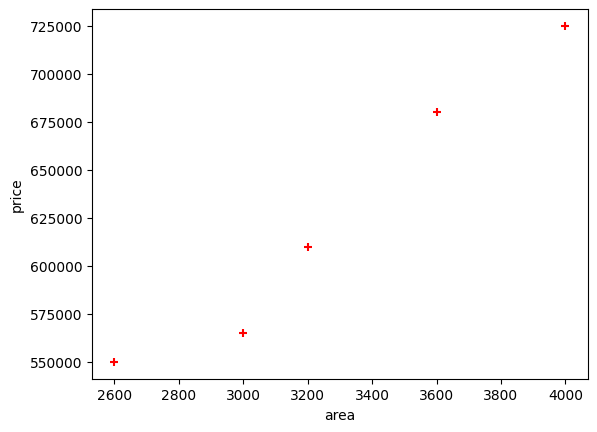

In [ ]:
# -*- coding: utf-8 -*-
"""Linear-Regression-Housing_Area_Price.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1CAlZml-P6V2V1RIrodgMfF8L3Ux4V9FT
"""

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('housing_area_price.csv')
df

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

"""(1) Predict price of a home with area = 3300 sqr ft"""

reg.predict([[3300]])

reg.coef_

reg.intercept_

"""Y = m * X + b (m is coefficient and b is intercept)"""

3300*135.78767123 + 180616.43835616432

"""(1) Predict price of a home with area = 5000 sqr ft"""

reg.predict([[5000]])

In [ ]:
# -*- coding: utf-8 -*-
"""Multiple_LR_HomePrice.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1fK78C8TPV44HdvT6lsMhaau2wMtKXquQ
"""

import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv("homeprices_Multiple_LR.csv")
df

"""Data Preprocessing: Fill NA values with median value of a column"""

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

reg.coef_

reg.intercept_

"""Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old"""

reg.predict([[3000, 3, 40]])

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


498408.25157402386

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Function to handle missing values
def clean_data(df, columns):
    print("Missing values before cleaning:")
    print(df.isnull().sum())

    # Drop rows with missing values
    df_cleaned = df.dropna()

    print("Missing values after cleaning:")
    print(df_cleaned.isnull().sum())

    return df_cleaned

# Function to perform linear regression and make predictions
def linear_regression_predict(df, x_col, y_col, predict_value):
    # Extract independent (X) and dependent (y) variables
    X = df[[x_col]].values.reshape(-1, 1)
    y = df[y_col].values.reshape(-1, 1)

    # Train the model
    model = LinearRegression()
    model.fit(X, y)

    # Predict the target value
    prediction = model.predict([[predict_value]])

    # Visualization
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
    plt.scatter(predict_value, prediction, color='green', marker='o', label=f'Prediction ({predict_value})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.title(f"Linear Regression: {x_col} vs {y_col}")
    plt.show()

    return prediction[0][0]


SyntaxError: incomplete input (<ipython-input-21-7ea8ca67000d>, line 65)

Missing values before cleaning:
year                       0
per capita income (US$)    0
dtype: int64
Missing values after cleaning:
year                       0
per capita income (US$)    0
dtype: int64


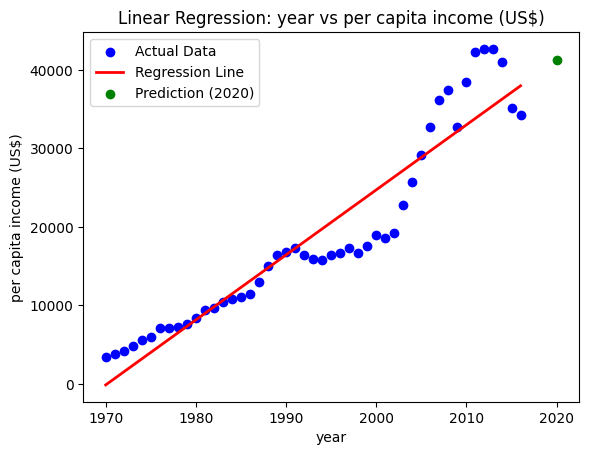

Predicted Per Capita Income in Canada for 2020: $41288.69


In [ ]:

# --- Predicting Canada's per capita income in 2020 ---
canada_income_file = "/content/canada_per_capita_income.csv"
df_canada = pd.read_csv(canada_income_file)

# Clean data
columns_to_check = ['year', 'per capita income (US$)']
df_canada_cleaned = clean_data(df_canada, columns_to_check)

# Predict per capita income in 2020
predicted_income = linear_regression_predict(df_canada_cleaned, 'year', 'per capita income (US$)', 2020)
print(f"Predicted Per Capita Income in Canada for 2020: ${predicted_income:.2f}")


Missing values before cleaning:
YearsExperience    2
Salary             0
dtype: int64
Missing values after cleaning:
YearsExperience    0
Salary             0
dtype: int64
Missing values before cleaning:
YearsExperience    2
Salary             0
dtype: int64
Missing values after cleaning:
YearsExperience    0
Salary             0
dtype: int64


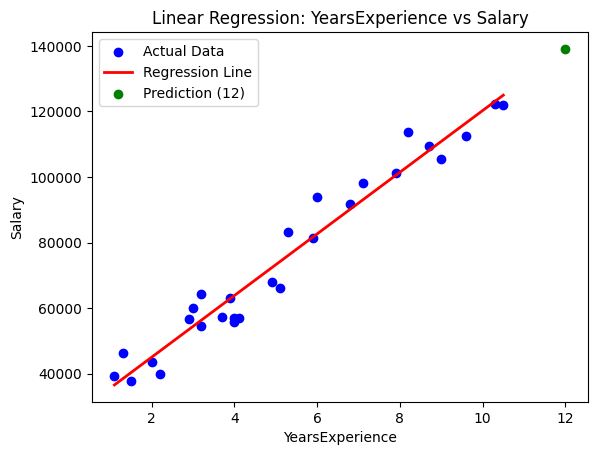

Predicted Salary for 12 years of experience: $139049.67


In [ ]:

# --- Predicting Salary for 12 years of experience ---
salary_file = "/content/salary.csv"
df_salary = pd.read_csv(salary_file)

# Clean data
df_salary_cleaned = clean_data(df_salary, ['YearsExperience', 'Salary'])
# --- Predicting Salary for 12 years of experience ---
salary_file = "/content/salary.csv"
df_salary = pd.read_csv(salary_file)

# Clean data
df_salary_cleaned = clean_data(df_salary, ['YearsExperience', 'Salary'])

# Predict salary for 12 years of experience
predicted_salary = linear_regression_predict(df_salary_cleaned, 'YearsExperience', 'Salary', 12)
print(f"Predicted Salary for 12 years of experience: ${predicted_salary:.2f}")

In [2]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/hiring.csv')

# Handle missing values
# Convert 'experience' column to numeric, replacing non-numeric with NaN
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')

imputer = SimpleImputer(strategy='mean')
df['experience'] = imputer.fit_transform(df[['experience']])
df['test_score(out of 10)'] = imputer.fit_transform(df[['test_score(out of 10)']])

# Prepare the data
X = df.drop('salary($)', axis='columns')
y = df['salary($)']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict salaries for the given candidates
candidate1 = [[2, 9, 6]]
candidate2 = [[12, 10, 10]]

predicted_salary1 = model.predict(candidate1)
predicted_salary2 = model.predict(candidate2)

print(f"Predicted salary for candidate 1: ${predicted_salary1[0]:.2f}")
print(f"Predicted salary for candidate 2: ${predicted_salary2[0]:.2f}")

Predicted salary for candidate 1: $62400.54
Predicted salary for candidate 2: $63416.00


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['experience']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv('/content/1000_Companies.csv')

# Separate features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

# Encode categorical data (State)
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

# Avoid dummy variable trap (remove one encoded column)
X = X[:, 1:]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the multiple linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict profit for the given values
new_prediction = regressor.predict([[1, 0, 91694.48, 515841.3, 11931.24]])
print(f"Predicted Profit: {new_prediction[0]:.2f}")


Predicted Profit: 433156.58
